### PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
!pip install TensorFlow

In [2]:
!pip install Keras

In [2]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [3]:
ff_df = pd.read_csv("forestfires.csv")
ff_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
ff_df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
ff_df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


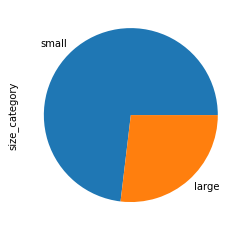

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
ff_df['size_category'].value_counts().plot.pie()
plt.show()

In [7]:
print(ff_df['size_category'].value_counts())

small    378
large    139
Name: size_category, dtype: int64


In [8]:
x=ff_df.drop(labels=['size_category'], axis=1)
y = ff_df[['size_category']]

In [9]:
from sklearn.preprocessing import LabelEncoder
x=x.apply(LabelEncoder().fit_transform)
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y = y.apply(LabelEncoder().fit_transform)
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [11]:
from keras.models import Sequential
from keras.layers import Dense

#Create Model

model = Sequential() 
model.add(Dense(12, input_dim=30,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [39]:
#Fit Model
model_training = model.fit(x=X_train,y=y_train, batch_size=10, epochs=150,validation_data=(X_test,y_test))

Epoch 1/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0296 - accuracy: 0.9798 - val_loss: 0.0446 - val_accuracy: 0.9708
Epoch 2/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0150 - accuracy: 0.9971 - val_loss: 0.0457 - val_accuracy: 0.9825
Epoch 3/150
35/35 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9884 - val_loss: 0.0527 - val_accuracy: 0.9825
Epoch 4/150
35/35 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0491 - val_accuracy: 0.9825
Epoch 5/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9971 - val_loss: 0.0489 - val_accuracy: 0.9825
Epoch 6/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0149 - accuracy: 0.9913 - val_loss: 0.0623 - val_accuracy: 0.9825
Epoch 7/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0373 - accuracy: 0.9769 - val_loss: 0.1049 - val_accuracy: 0.9708
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0154 - accuracy: 0.9913 - val_loss: 0.0480 - val_accuracy: 0.9766
Epoch 60/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0484 - val_accuracy: 0.9766
Epoch 61/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9942 - val_loss: 0.0557 - val_accuracy: 0.9825
Epoch 62/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9942 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 63/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9913 - val_loss: 0.0509 - val_accuracy: 0.9766
Epoch 64/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0602 - val_accuracy: 0.9766
Epoch 65/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.9971 - val_loss: 0.0639 - val_accuracy: 0.9825
Epoch 

35/35 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9884 - val_loss: 0.0666 - val_accuracy: 0.9708
Epoch 117/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9971 - val_loss: 0.0608 - val_accuracy: 0.9708
Epoch 118/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.9971 - val_loss: 0.0808 - val_accuracy: 0.9708
Epoch 119/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9884 - val_loss: 0.0736 - val_accuracy: 0.9708
Epoch 120/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0682 - val_accuracy: 0.9766
Epoch 121/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9913 - val_loss: 0.1053 - val_accuracy: 0.9766
Epoch 122/150
35/35 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0807 - val_accuracy: 0.9708
Epoch 123/150

In [40]:
#Evaluate Model

model_result = model.evaluate(x=X_test,y=y_test)
print('Model Loss     - ',round(model_result[0],2))
print('Model Accuracy - ',round(model_result[1],2))

6/6 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9708
Model Loss     -  0.1
Model Accuracy -  0.97


In [41]:
# list all data in history
model_training.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
y_pred = model.predict(X_test)
pd.DataFrame(y_pred)

,0
0,9.758273e-09
1,1.000000e+00
2,1.000000e+00
3,1.000000e+00
4,9.930362e-01
...,...
166,9.999647e-01
167,1.000000e+00
168,1.000000e+00
169,1.000000e+00


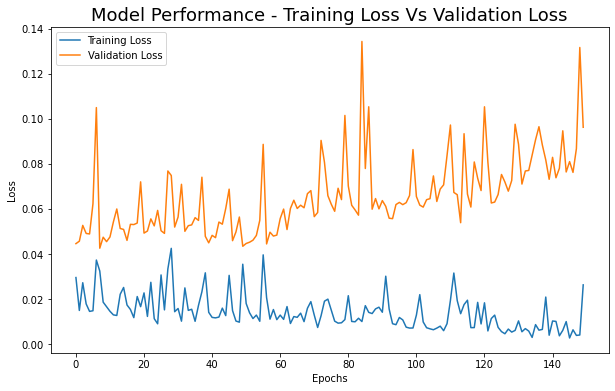

In [43]:
#Model Performance

plt.figure(figsize=(10,6))
plt.plot(model_training.history['loss'],    label = 'Training Loss')
plt.plot(model_training.history['val_loss'],label = 'Validation Loss')

plt.title('Model Performance - Training Loss Vs Validation Loss',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

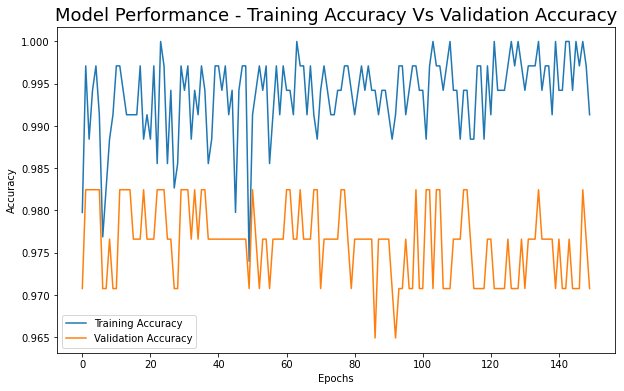

In [44]:
plt.figure(figsize=(10,6))
plt.plot(model_training.history['accuracy'],    label = 'Training Accuracy')
plt.plot(model_training.history['val_accuracy'],label = 'Validation Accuracy')

plt.title('Model Performance - Training Accuracy Vs Validation Accuracy',size = 18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()